# Relatório de Gorjetas

## Importando base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('../Data/Tips_atualizado.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

### Nome das colunas

In [4]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [6]:
type(renomear)

dict

In [7]:
gorjetas = dados.rename(columns= renomear)

In [8]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


### Dados das Linhas

#### Coluna Sobremesa

In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [11]:
type(sim_nao)

dict

In [12]:
gorjetas.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [13]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [14]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


#### Coluna dia_da_semana

In [15]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dias = {
    'Sun': 'Domingo',
    'Mon': 'Segunda',
    'Tue': 'Terça',
    'Wed': 'Quarta',
    'Thur': 'Quinta',
    'Fri': 'Sexta',
    'Sat': 'Sábado'
}

In [17]:
type(dias)

dict

In [18]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [19]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


#### Coluna hora_do_dia

In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Análises gráficas

### Importando o Seaborn 

In [24]:
!pip install seaborn==0.9.0

You should consider upgrading via the 'a:\documentos\meusprojetos\data_science\cursos_alura\data_visualization_com_seaborn\scripts\python.exe -m pip install --upgrade pip' command.


In [25]:
import seaborn as sns

In [26]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: a:\documentos\meusprojetos\data_science\cursos_alura\data_visualization_com_seaborn\lib\site-packages
Requires: pandas, matplotlib, scipy, numpy
Required-by: 


### Análise 1 - Valor da conta e gorjeta

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

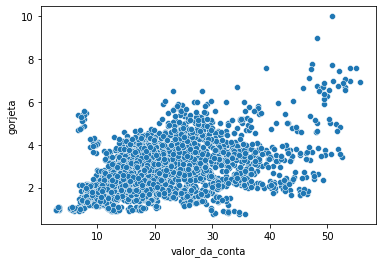

In [28]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta**

In [29]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 3416 registros 

Registros não nulos:


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

#### Criando o campo porcentagem

In [30]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [31]:
gorjetas['porcentagem'] = gorjetas.gorjeta / gorjetas.valor_da_conta

In [32]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [33]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [34]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


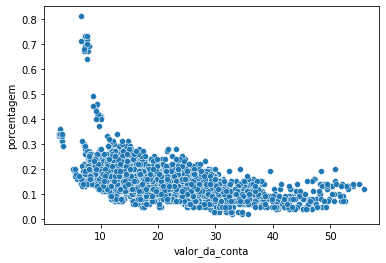

In [35]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

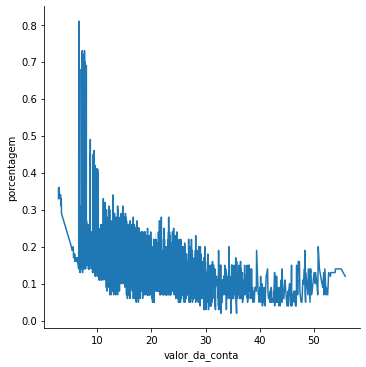

In [36]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

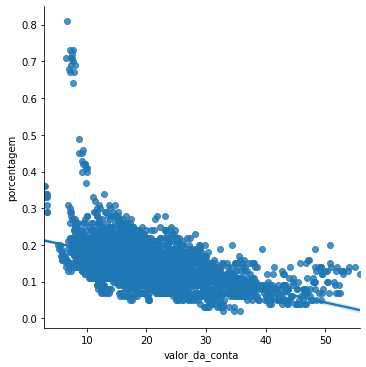

In [37]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

### Análise 2 - Sobremesas

In [38]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [39]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.010000,3.000000,Sim,Sábado,Jantar,4,0.08
58,11.240000,1.760000,Sim,Sábado,Jantar,2,0.16
60,20.290000,3.210000,Sim,Sábado,Jantar,2,0.16
61,13.810000,2.000000,Sim,Sábado,Jantar,2,0.14
62,11.020000,1.980000,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
3406,16.882586,2.967175,Sim,Sábado,Jantar,2,0.18
3408,11.840990,1.044625,Sim,Sábado,Jantar,2,0.09
3409,34.704251,0.882144,Sim,Sábado,Jantar,2,0.03
3412,25.531567,1.604021,Sim,Sábado,Jantar,2,0.06


In [40]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [41]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


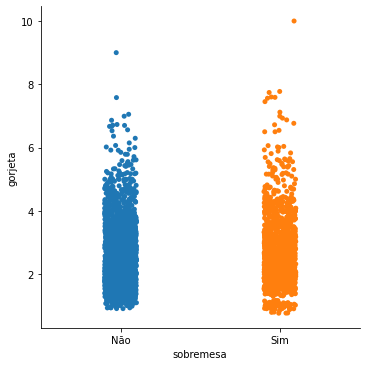

In [42]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

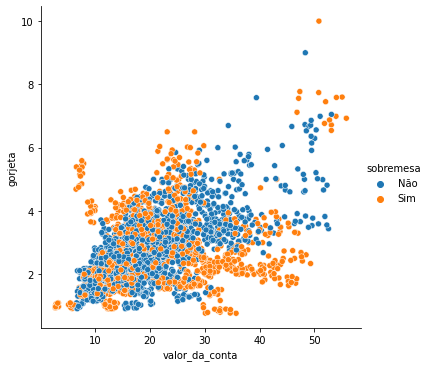

In [43]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

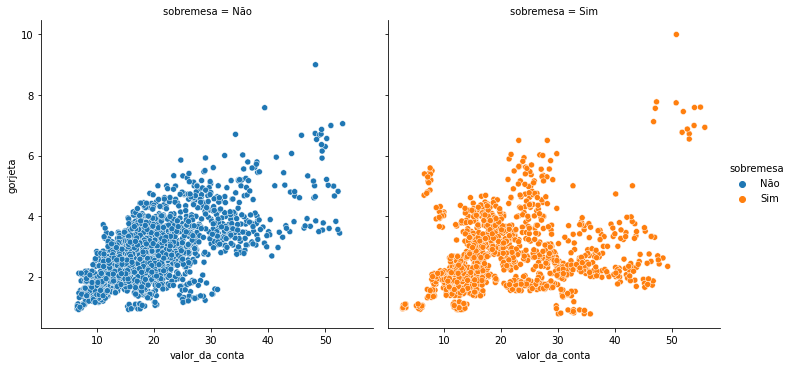

In [44]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

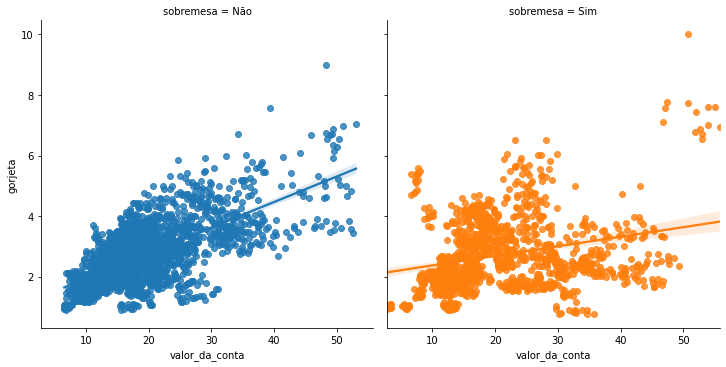

In [45]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

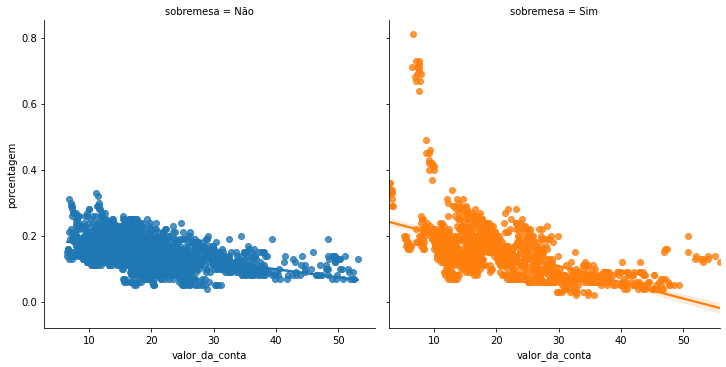

In [46]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

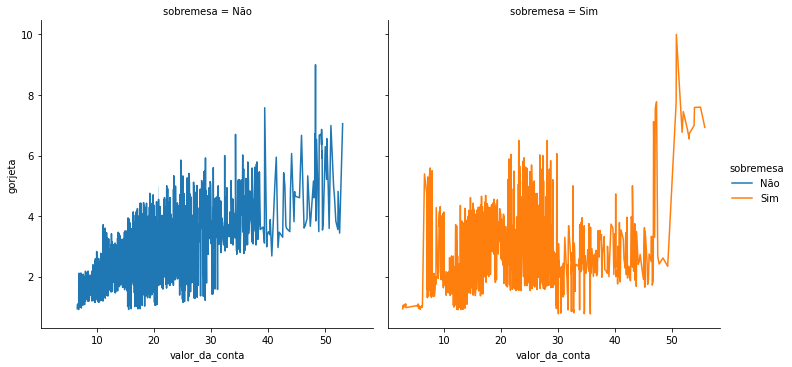

In [47]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa',kind='line' , data=gorjetas)

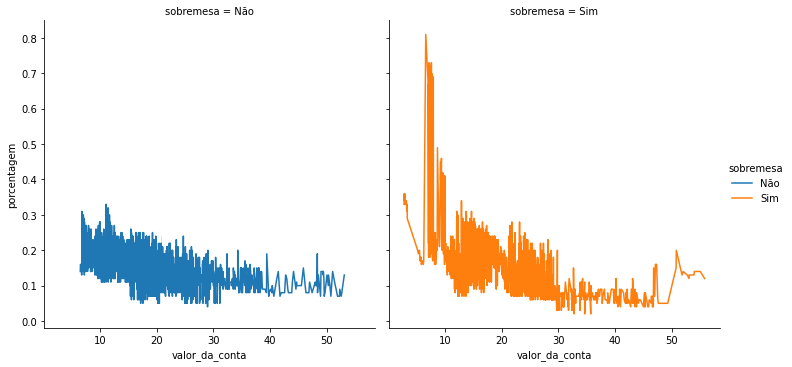

In [48]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa',kind='line' , data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremessa e não pediram sobremesa**

#### Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [49]:
from scipy.stats import ranksums

In [50]:
sobremesa = gorjetas.query("sobremesa=='Sim'").porcentagem

In [51]:
sem_sobremesa = gorjetas.query("sobremesa=='Não'").porcentagem

In [52]:
r = ranksums(sobremesa, sem_sobremesa)

In [53]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.033144013617673405


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

### Análise 3 - Dia da semana

In [54]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

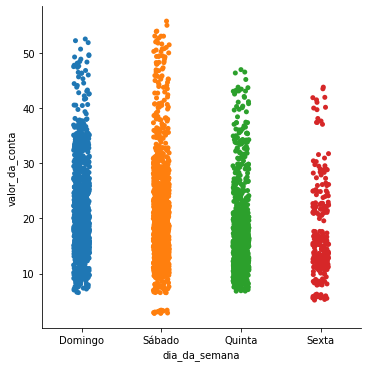

In [55]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

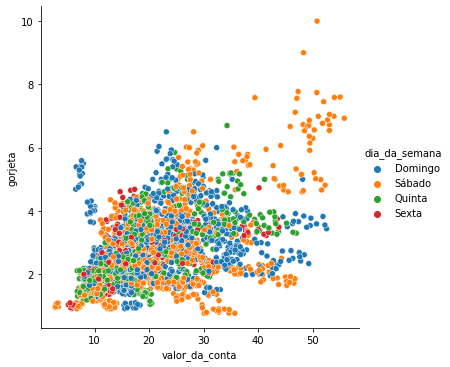

In [56]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

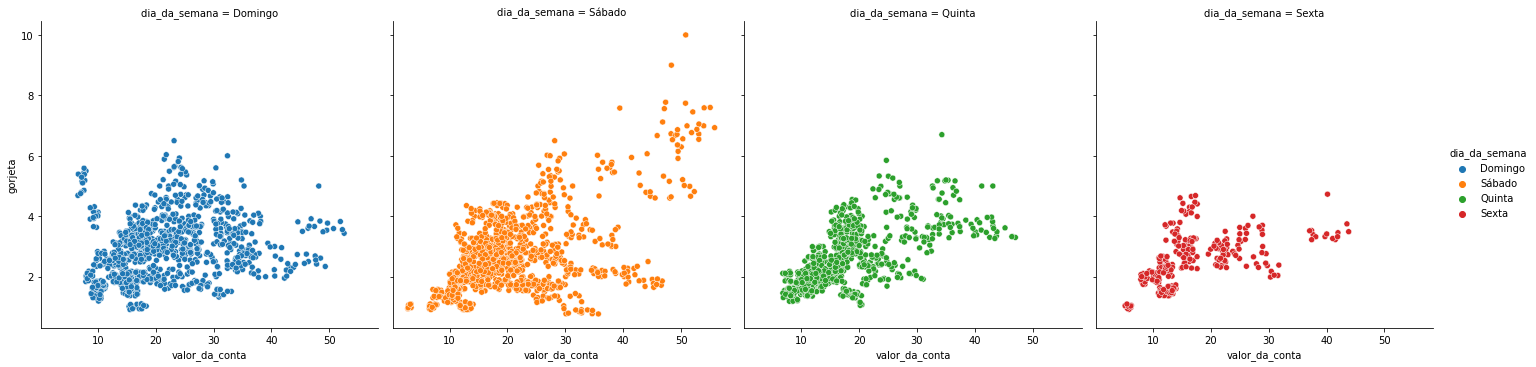

In [57]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

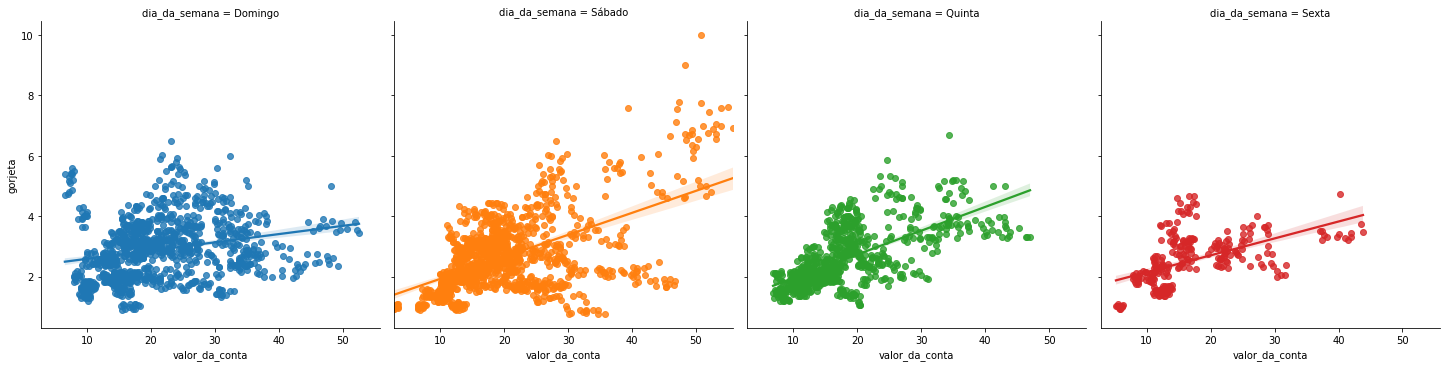

In [58]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

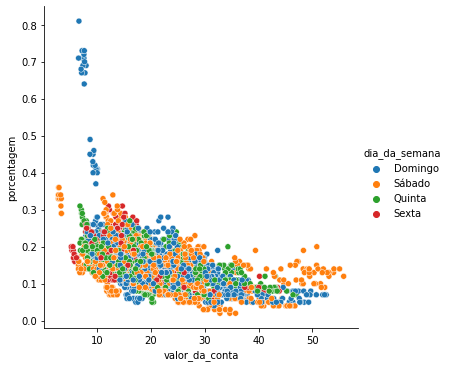

In [59]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

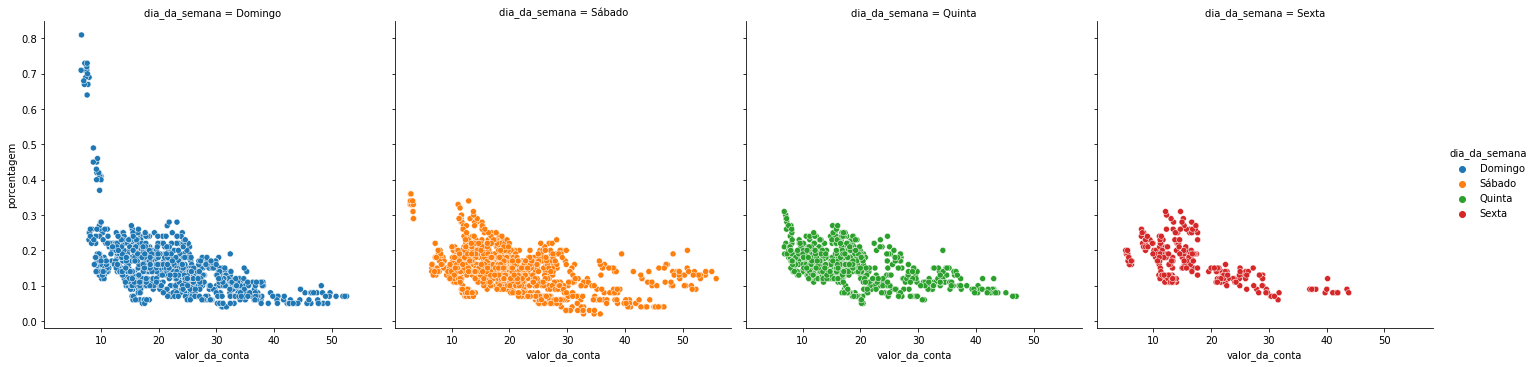

In [60]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

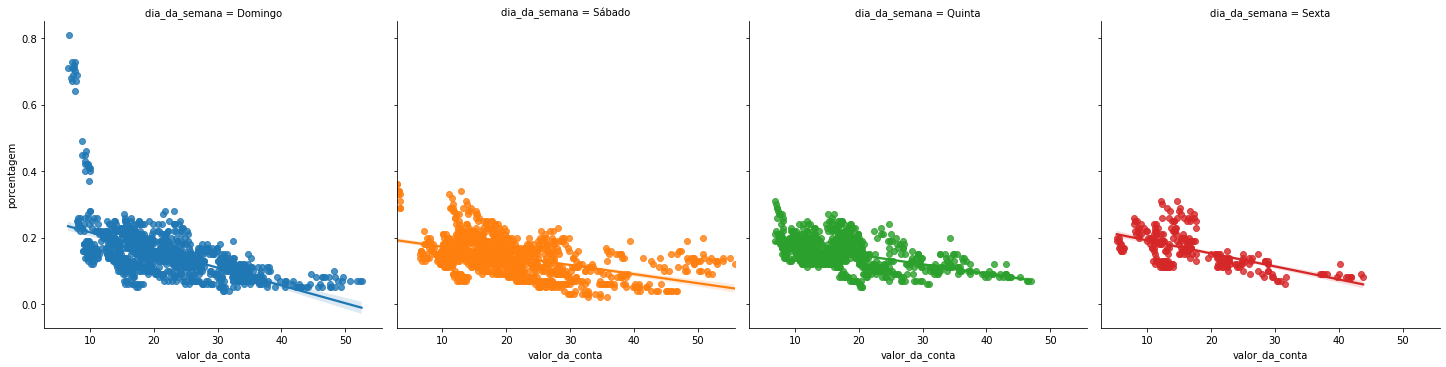

In [61]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [62]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [63]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.711189214091612


In [64]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [65]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

#### Teste de hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não igual no sábado e no domingo**

In [66]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [67]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [68]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [69]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0004435935681441821


**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

### Análise 4 - Horas do dia

In [70]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [71]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

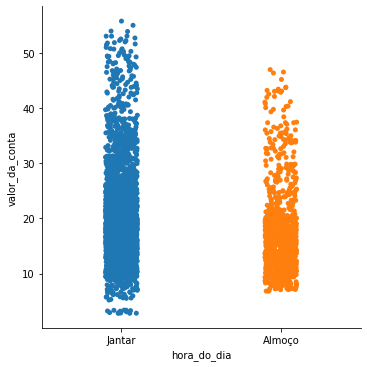

In [72]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

c:\users\ramon\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\ramon\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


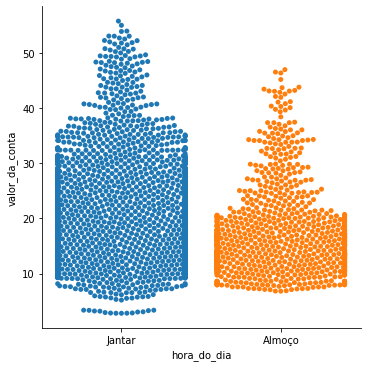

In [73]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

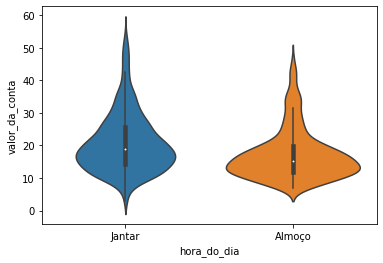

In [74]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

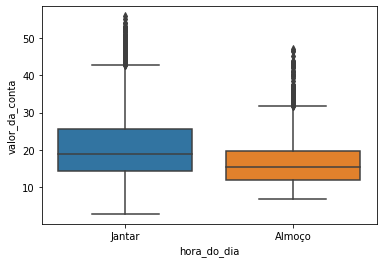

In [75]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [76]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

c:\users\ramon\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

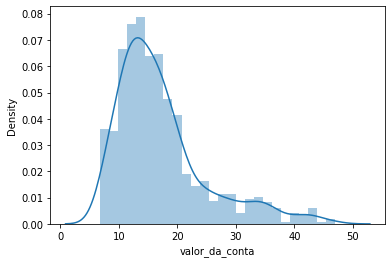

In [77]:
sns.distplot(almoco)

c:\users\ramon\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

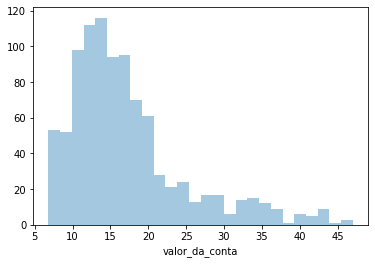

In [78]:
sns.distplot(almoco, kde=False)

In [79]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

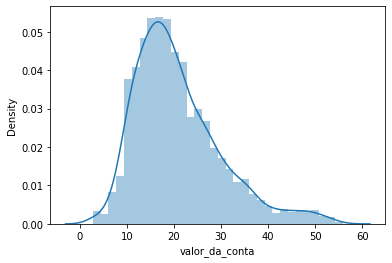

In [80]:
sns.distplot(jantar)

c:\users\ramon\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

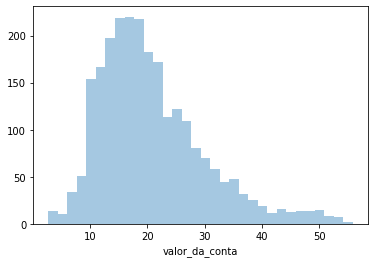

In [81]:
sns.distplot(jantar, kde=False)

In [82]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


#### Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A distribuição do valor da conta é não igual no jantar e no almoço**

In [83]:
r3 = ranksums(jantar, almoco)

In [84]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 5.169201062207143e-34


**H<sup>alt</sup>**
>**A distribuição do valor da conta não igual no jantar e no almoço**

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não igual no jantar e no almoço**

In [85]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [86]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [87]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [88]:
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 1.3785725618355523e-11
